<a href="https://colab.research.google.com/github/Kim-jong-hoon/week-6-4/blob/main/%EC%95%99%EC%83%81%EB%B8%94_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics onnxruntime ensemble-boxes opencv-python matplotlib --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46

Saving 화면 캡처 2025-07-31 095138.png to 화면 캡처 2025-07-31 095138.png


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


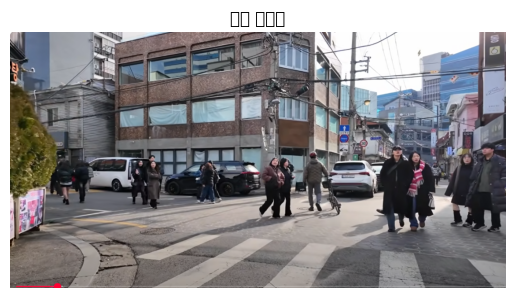

In [2]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()  # 이미지 업로드

# 파일명 가져오기
img_path = list(uploaded.keys())[0]
image_bgr = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("원본 이미지")
plt.axis("off")
plt.show()


In [3]:
from ultralytics import YOLO

yolo_model = YOLO('yolov8n.pt')  # 필요시 yolov8m.pt나 커스텀 모델로 변경

def run_yolo(image):
    results = yolo_model(image)[0]
    detections = []

    for box in results.boxes:
        cls = int(box.cls[0].cpu().item())
        if cls in [0, 2]:  # 0: person, 2: car
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().item()
            detections.append([x1, y1, x2, y2, conf, cls])
    return detections


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.3MB/s]


In [4]:
def run_peoplenet(image):
    # 사람 하나 감지한 것처럼 가정
    return [[120, 180, 190, 330, 0.85, 0]]  # class 0: person

def run_trafficnet(image):
    # 차량 하나 감지한 것처럼 가정
    return [[400, 200, 500, 350, 0.90, 2]]  # class 2: car


In [5]:
from ensemble_boxes import weighted_boxes_fusion

def normalize_boxes(detections, h, w):
    return [[x1/w, y1/h, x2/w, y2/h] for x1, y1, x2, y2, *_ in detections]

def extract_scores(detections):
    return [conf for *_, conf, _ in detections]

def extract_labels(detections):
    return [int(cls) for *_, cls in detections]

def run_ensemble(yolo, people, traffic, shape):
    h, w = shape[:2]
    boxes_list = []
    scores_list = []
    labels_list = []

    for dets in [yolo, people, traffic]:
        boxes_list.append(normalize_boxes(dets, h, w))
        scores_list.append(extract_scores(dets))
        labels_list.append(extract_labels(dets))

    boxes, scores, labels = weighted_boxes_fusion(
        boxes_list, scores_list, labels_list, iou_thr=0.5, skip_box_thr=0.3)

    # 다시 원래 크기로 복원
    return [[b[0]*w, b[1]*h, b[2]*w, b[3]*h, s, l]
            for b, s, l in zip(boxes, scores, labels)]



0: 352x640 15 persons, 4 cars, 307.3ms
Speed: 11.7ms preprocess, 307.3ms inference, 39.8ms postprocess per image at shape (1, 3, 352, 640)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50521 (\N{HANGUL SYLLABLE ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


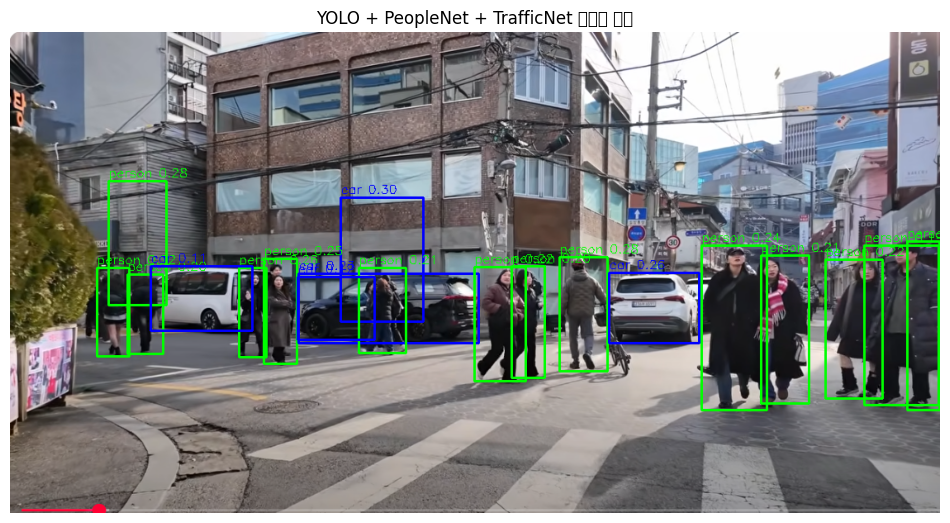

In [6]:
# 모델 실행
yolo_results = run_yolo(image_rgb)
people_results = run_peoplenet(image_rgb)
traffic_results = run_trafficnet(image_rgb)

# 앙상블
final_detections = run_ensemble(yolo_results, people_results, traffic_results, image_rgb.shape)

# 시각화
output = image_bgr.copy()
for x1, y1, x2, y2, conf, cls in final_detections:
    color = (0, 255, 0) if cls == 0 else (255, 0, 0)  # 사람: 초록, 차량: 파랑
    label = f"{'person' if cls == 0 else 'car'} {conf:.2f}"
    cv2.rectangle(output, (int(x1), int(y1)), (int(x2), int(y2)), color, 2)
    cv2.putText(output, label, (int(x1), int(y1) - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# 출력
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO + PeopleNet + TrafficNet 앙상블 결과")
plt.show()
